# Introduction

This dataset is collected from online website for owner to advertising their boats for sale. The data set consists of each boat characteristic such as boat type, year that been built and other details like country of the boats, number of views on the boat in last 7 days.

The marketing team of the website want to increase numbers of site's visitor and give us 2 questions.

1. Is it the most expensive boats that get the most views
2. Are there common features among the most viewed boats

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

###### Get the data

In [2]:
boats = pd.read_csv('C:\\boat_data.csv')

###### Inspect data

In [3]:
print(boats.info(),'\n')
print(boats.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9888 entries, 0 to 9887
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price                        9888 non-null   object 
 1   Boat Type                    9888 non-null   object 
 2   Manufacturer                 8550 non-null   object 
 3   Type                         9882 non-null   object 
 4   Year Built                   9888 non-null   int64  
 5   Length                       9879 non-null   float64
 6   Width                        9832 non-null   float64
 7   Material                     8139 non-null   object 
 8   Location                     9852 non-null   object 
 9   Number of views last 7 days  9888 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 772.6+ KB
None 

       Price            Boat Type          Manufacturer                 Type  \
0   CHF 3337          Motor Yacht  Rigiflex po

###### Preparing data

Since Price column contains many currencies. I changed all price records to EUR in cost_EUR column to make it easier to compare.

In [4]:
currency = [] 
for i in boats['Price']:
	if i.split()[0] not in currency:
		currency.append(i.split()[0])

boats[['currency','cost_EUR']] = boats['Price'].str.split(expand=True)



for i in range (len(boats)):
	if boats.iloc[i,10] == currency[0]:
		boats.iloc[i,11] = float(boats.iloc[i,11])* 1.02
	elif boats.iloc[i,10] == currency[2]:
		boats.iloc[i,11] = float(boats.iloc[i,11])* 0.13
	elif boats.iloc[i,10].split()[0] == currency[3]:
		boats.iloc[i,11] = float(boats.iloc[i,11])* 1.16
	else :
		boats.iloc[i,11] = float(boats.iloc[i,11])

In [5]:
print(boats.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9888 entries, 0 to 9887
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price                        9888 non-null   object 
 1   Boat Type                    9888 non-null   object 
 2   Manufacturer                 8550 non-null   object 
 3   Type                         9882 non-null   object 
 4   Year Built                   9888 non-null   int64  
 5   Length                       9879 non-null   float64
 6   Width                        9832 non-null   float64
 7   Material                     8139 non-null   object 
 8   Location                     9852 non-null   object 
 9   Number of views last 7 days  9888 non-null   int64  
 10  currency                     9888 non-null   object 
 11  cost_EUR                     9888 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 927.1+ KB
None


In [6]:
print(boats['cost_EUR'])

0       3403.74
1        3490.0
2        3845.4
3        3367.0
4        3399.0
         ...   
9883     4998.0
9884     4516.0
9885     4499.0
9886     4300.0
9887     3855.6
Name: cost_EUR, Length: 9888, dtype: object


###### Change column names for easier access

In [7]:
boats.rename(columns={'Number of views last 7 days':'Views','Boat Type':'Boat_type','Year Built':'Year_built'},inplace = True)

#### Our first question: Is it the most expensive boats that get the most views

To answer this question, I plot graph between number of views and boat's price.

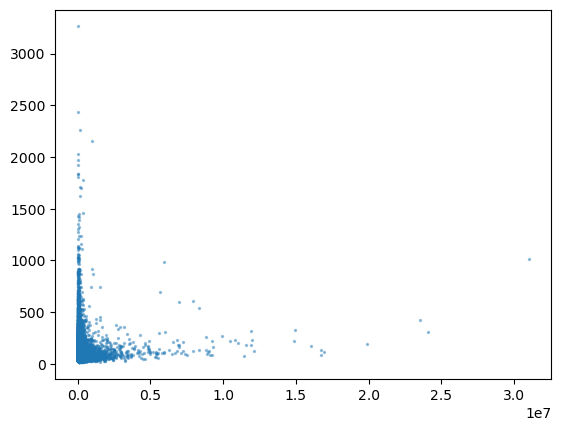

In [8]:
plt.scatter(boats['cost_EUR'],boats['Views'],s=2,alpha=0.4)
plt.show()

From the graph, we can see that most of the data compact in bottom left corner so I plot again using log scale.

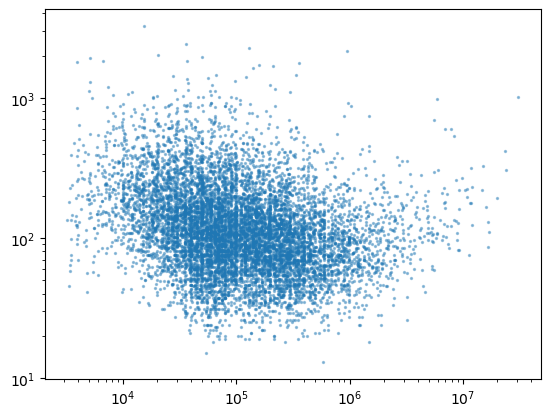

In [9]:
plt.scatter(boats['cost_EUR'],boats['Views'],s=2,alpha=0.4)
plt.xscale('log')
plt.yscale('log')
plt.show()

According to this graph, it's not true that the most expensive boats get the most views. Price of boats that have more than 1000 views in last 7 days which considered very high are mostly between 10,000 to 1,000,000 EUR.

#### Next question: Are there common features among the most viewed boats

I consider top 10 percent highest view are the most viewd boats that use to answer this question.

In [32]:
boats_sort = boats.sort_values("Views",ascending = False)
boats_filter = boats_sort[0:len(boats_sort)//10]
print(boats_filter.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 988 entries, 9580 to 647
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         988 non-null    object 
 1   Boat_type     988 non-null    object 
 2   Manufacturer  909 non-null    object 
 3   Type          987 non-null    object 
 4   Year_built    988 non-null    int64  
 5   Length        985 non-null    float64
 6   Width         979 non-null    float64
 7   Material      910 non-null    object 
 8   Location      988 non-null    object 
 9   Views         988 non-null    int64  
 10  currency      988 non-null    object 
 11  cost_EUR      988 non-null    object 
dtypes: float64(2), int64(2), object(8)
memory usage: 100.3+ KB
None


I plot a graph to see location of the most viewed boats

Text(0, 0.5, 'Proportion')

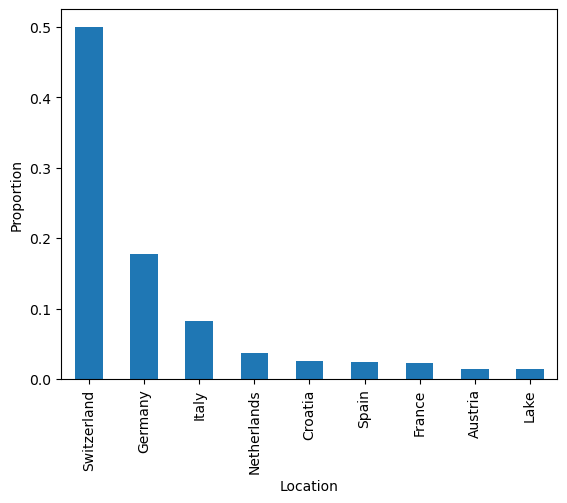

In [48]:
location_grouped = boats_filter.groupby("Location")['Location'].count().sort_values(ascending=False)
location_filter = location_grouped[location_grouped>len(boats_filter)/100]/len(boats_filter)
ax = location_filter.plot.bar()
plt.ylabel('Proportion')

Graph shows that nearly half of the most viewed boats are in Switzerland.

Next, I'm gonna plot type of the most viewed boats

Text(0, 0.5, 'Proportion')

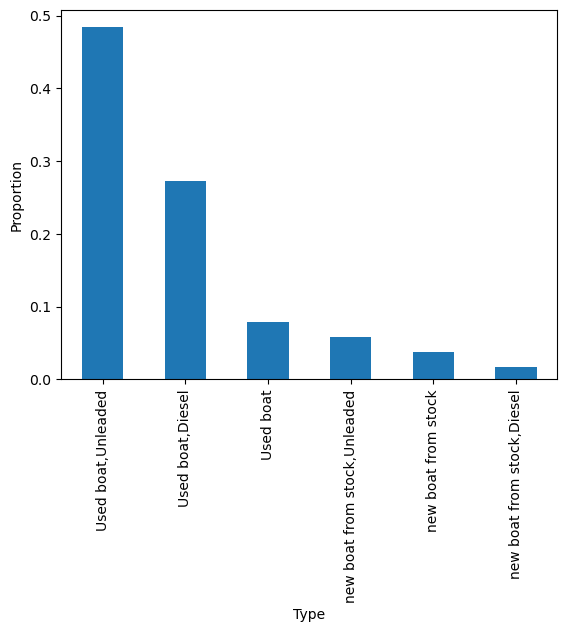

In [49]:
type_grouped = boats_filter.groupby("Type")['Type'].count().sort_values(ascending=False)
type_filter = type_grouped[type_grouped>len(boats_filter)/100]/len(boats_filter)
bx = type_filter.plot.bar()
plt.ylabel('Proportion')

From this graph, used boat with unleaded fuel are nearly half of the most viewed boats

In conclusion, common features among the most viewed both are boats that based in Switzerland and used boat with unleaded fuel.